In [27]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Membaca dataset
df = pd.read_csv('/content/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [14]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [15]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [16]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [17]:
# Mengonversi nilai kategorikal pada kolom tertentu menjadi nilai numerik menggunakan LabelEncoder
label_cols = ['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
'no_of_style_change', 'no_of_workers', 'actual_productivity']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [19]:
# Menetapkan fitur (X) dan target (y)
X = df.drop(['actual_productivity'], axis=1)  # Menghapus kolom target 'actual_productivity'
y = df['actual_productivity']  # Kolom target 'actual_productivity'

In [20]:
# Membagi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Melakukan standardisasi pada fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Konversi data ke tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [23]:
# Membuat model MLP untuk tugas regresi
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, activation):
        super(MLPRegression, self).__init__()
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.neurons = neurons
        self.activation = activation

        # Menambahkan layer pertama dari input ke hidden layer pertama
        layers = []
        layers.append(nn.Linear(self.input_size, self.neurons))

        # Menambahkan hidden layers tambahan sesuai jumlah yang ditentukan
        for _ in range(self.hidden_layers - 1):
            layers.append(self.activation())  # Menambahkan fungsi aktivasi
            layers.append(nn.Linear(self.neurons, self.neurons))  # Menambahkan layer dense

        layers.append(nn.Linear(self.neurons, 1))  # Menambahkan layer output (1 neuron)

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze()  # Menghasilkan output dengan menghapus dimensi ekstra


In [24]:
# Menentukan perangkat yang akan digunakan (GPU jika tersedia, jika tidak gunakan CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Daftar hyperparameter untuk diuji
hidden_layers = [1, 2, 3]  # Jumlah hidden layers
neurons = [4, 8, 16, 32, 64]  # Jumlah neuron di setiap layer
activations = [nn.Sigmoid, nn.ReLU, nn.Softmax, nn.Tanh]  # Fungsi aktivasi
epochs_list = [1, 10, 25, 50, 100, 250]  # Jumlah epoch untuk pelatihan
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]  # Nilai learning rate
batch_sizes = [16, 32, 64, 128, 256, 512]  # Ukuran batch

# Variabel untuk menyimpan hasil eksperimen
results = []

# Melakukan eksperimen menggunakan semua kombinasi hyperparameter
for layers in hidden_layers:
    for neuron in neurons:
        for activation in activations:
            for epochs in epochs_list:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        # Membuat model dan memindahkannya ke perangkat (GPU/CPU)
                        model = MLPRegression(input_size=X_train_tensor.shape[1],
                                              hidden_layers=layers,
                                              neurons=neuron,
                                              activation=activation).to(device)

                        # Mendefinisikan fungsi loss dan optimizer
                        criterion = nn.MSELoss()  # Mean Squared Error sebagai fungsi loss
                        optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer

                        # Training loop untuk melatih model
                        for epoch in range(epochs):
                            model.train()
                            optimizer.zero_grad()  # Reset gradien
                            outputs = model(X_train_tensor.to(device))  # Forward pass
                            loss = criterion(outputs, y_train_tensor.to(device))  # Hitung loss
                            loss.backward()  # Backpropagation
                            optimizer.step()  # Perbarui parameter model

                        # Evaluasi model setelah selesai pelatihan
                        model.eval()
                        with torch.no_grad():
                            y_pred = model(X_test_tensor.to(device)).cpu().numpy()  # Prediksi pada data uji
                            mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
                            mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
                            r2 = r2_score(y_test, y_pred)  # R-squared score
                            accuracy = (1 - mae / max(y_test)) * 100  # Estimasi akurasi dalam persentase

                        # Menyimpan hasil ke dalam daftar
                        results.append({
                            'layers': layers,
                            'neurons': neuron,
                            'activation': activation.__name__,
                            'epochs': epochs,
                            'lr': lr,
                            'batch_size': batch_size,
                            'mae': mae,
                            'mse': mse,
                            'r2': r2,
                            'accuracy': accuracy
                        })
                        # Menampilkan hasil setiap kombinasi hyperparameter
                        print(f"Layers: {layers}, Neurons: {neuron}, Activation: {activation.__name__}, Epochs: {epochs}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy}")


Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 46.89788759006226
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 47.53811725264177
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 3.882094046646123
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 47.000929741828344
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 47.469198027926474
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.7281449113625604
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.27500809362144
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 45.39148537372783
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 64, Accuracy: 45.13773247925405
Layers: 1, Neurons: 4, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.12493762814614
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.1414756467448
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.12717975624332
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.13972044088258
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.13863311946895
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.17480395249179
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.15870247314866
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.14660181921357
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 61.333116766223974
L

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 77.83478476784447
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 76.71034917915559
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 76.5991705223935
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 77.18220036561159
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 76.34758392146688
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 78.60320041131187
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 46.06914035332903
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 46.09573106656918
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 45.97677598682728
Layers: 2, Neurons: 4, Activa

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 46.40428355886051
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 46.336744418764276
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.23920731539693
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.26188524164857
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.13264539372569
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.25483499402212
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.29208387820872
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.19103760845704
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.088919162790255
Laye

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.165664616630686
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.16091819262432
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.15498655779794
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.232396011391174
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.237448261782816
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.131035459402554
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.14771611686606
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.16642903714392
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.15

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.16451897579387
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 80.08834525731316
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 70.71004762931213
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 78.09191952183369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 74.9503677303781
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 77.83821816365747
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 77.10839470913459
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.74127934744499
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 79.39268962331873
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 75.81241187712769


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 80.14315731369037
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 78.05613625676045
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 79.13571301026046
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 52.14838928585544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 50.71532060691211
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 51.37766331971538
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 52.768978306192714
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 51.82779061369024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 51.109948995975785
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.32926528279837
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.39281195603342
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.311257738890106
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.32236409441099


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.26649637302826
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.276845163102344
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.20531577379294
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.262283963384554
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.18173731390871


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.1458098475886
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.20330720752946
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.23555206651484
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.10987065365237
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.146078888254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.10511280323611
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.14225919319065
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.15589863783171
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.21915907145267


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 77.21610181579473
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 79.84521342732232
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 77.41025056059807


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 78.51347241037688
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 80.52797553820037
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 79.83857556142979


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 80.91342767262577
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 81.30123934436678


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 80.47196140589273
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 81.73166929829564


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 81.78774610167497
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 81.0249282813502


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 69.89494930248313
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 70.05830015585622


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 69.46501708826344
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 70.89926896353174


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 68.59170705182918
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 70.78712098297599


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 45.55471387947937
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 45.44840587993942


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 45.59145104795934
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 45.56278565113326


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 45.828055221777475
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 45.60809239385043


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.1756120886365
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.11660195095446


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.157775278937315
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.22802347525251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.107957918109754
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.228864010702075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.11467785343362
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.10919340049164


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.183015898156576
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.2346022960083


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.21835925255441
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.139500323781625


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 80.04532384195683
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 80.63512587757644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 81.00950489110036
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 77.29277418727018


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 80.98141849841201
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 81.09251931749819


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.10598944227586
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 81.33653882915232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 81.02676513783082
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 82.07287661454026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 81.64405518397547
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 81.86436812997458


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 81.03655462846658
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 82.4341127010063


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 81.62004474483324
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 80.48642341048955


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 81.45131410745812
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 81.48057993225638


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 47.03130900196797
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 46.67653586108153


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 47.0313694424953
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 47.20383253552971


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 46.72147555327479
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 47.12672457138972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.192131142896116
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.17792704252053


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.174735674629574
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.15949064722255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.23589511622368
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.295822824646926


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.20405068847101
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.158224552830504


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.1158678181981
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.202020371656424


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.073562499848784
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.19668974142378


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 81.01366318913772


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 80.68282963262922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 80.98855438203157


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 81.09428264923739


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 80.86480609292403


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 81.0807464696184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 81.22350163783523


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 82.34209108224626


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 81.00581342157935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 81.5675515839548


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 80.50916674679434


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 81.52918235799294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 85.25161201760922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.96254251229155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 83.89578993767671


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 84.27503390471324


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 85.27873128503961


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 82.99025636182053


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 57.72911960702771


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 57.53333537661804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 57.68669973811657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 57.78699282626791


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 57.713860682614424


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 57.768009362844474


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.39549069331211


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.39705711417972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.18773777293214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.32057796803913


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.44267625748356


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.4617301115461


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.13812871514825


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.142260582922546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.134662007709366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.14306462247326


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.11315819570502


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.19546158113783
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -23.80619101566421
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 48.31403875515568
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -10.218728324852089
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 48.8545638508023
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 65.44285409515463
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 22.132072795795487
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.67135707804263
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 45.1897441748977
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1,

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.176071282018924
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.19738698750449
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.21433958182869
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.186885510998906
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.162794779287566
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 42.92262967171503
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 23.755027645156446
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 65.60814278858304
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 67.67431814459306
Layer

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 46.89621165926356
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.29065245045846
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.30847584162125
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.25658029158384
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.22217663118596
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.24751160761087
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.24600948022388
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.190431487685444
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.18335081651196
Laye

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.21054584031412
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.142270883021574
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.18436313859724
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.18417698129337
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.14643182227117
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.207124930268094
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.17450503420869
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.14577714389095
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.13

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 59.002261778198985
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 72.76713252387653
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 77.90024854325681
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 70.28062664232448
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 73.96056221690176


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 72.74191718472802
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.78178988135907
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 79.41440447656231
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 79.98281696174718
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 81.59475410675061


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 79.64976156722736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 80.00728372325831
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 56.43563103026524
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 56.173592981909906
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 56.671846632670295


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 57.297607860118895
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 57.63175032995741
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 57.60113156797513
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.41601644989674
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.32004498113926


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.42388832210168
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.39176483937594
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.35814562816021
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.38457786312129
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.221647118994525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.139606066654025
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.18890800281764
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.14220055818592
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.17268693572933
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.21281388261376
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.165830574344554


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.1598344537875
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.19087405896045
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.19224789847042
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.18687594799153
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.199931717624565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 77.31425113773089
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 80.22842108723209
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 80.16985598770101


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 73.63529041438072
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 77.94256802212473
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 76.20581868694438


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 80.82036691101567
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 81.78911171793526


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 81.4453835408716
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 80.80010432779994


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 80.8543003917792
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 82.12190413685379


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 80.91634462837246
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 80.08972017253822


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 80.68242418752304
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 80.37584251400882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 79.04411252998145
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 80.64543978300047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 45.79556118906984
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 46.1165681658552


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 45.79034763572314
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 46.05710464256405


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 45.924478580451435
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 46.07277286180738


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.16880072013836
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.170828940051756


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.2286879069986
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.21209650361817


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.1689540463763
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.18197757224465


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.142691362889266
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.13745144208215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.142422262693515
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.17011802980899


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.1685439998882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.17057647304499
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 74.98227270526542
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 77.9099273608478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 81.20262494615818
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 81.04585420778989


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 78.84645035498252
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 72.70171073281449


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.89478016375215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 82.56021558163859


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 81.56901909009132


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 83.08318792561896


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 81.39998506576018


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 83.50289752669018
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 82.02481243132081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 82.78258828125469
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 81.63168086647119


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 82.22513532839747
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 83.09690201835794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 83.38466742324975
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 48.729984288385744


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 49.068080575977376
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 48.67777012754411


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 49.01045309797667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 48.9751840561434


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 48.95320829505613
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.30552207143269


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.2456823157416
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.26810157005249


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.23687774994946
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.24657525659453


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.265483759175005
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.14936847528668


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.17580203045378
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.140933376670134


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.20061992651111
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.1549557184834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.185744493276644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 80.52673922949565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 81.38479086462912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 81.34659896282844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 77.25846050980908


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 81.19471419026763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 78.15059666986616


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 81.37015377464631


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 82.88904029837411


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 82.66878310226599


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 81.6499661576213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 82.43825007088577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 82.75935723583132


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 84.65855291532655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.6229673765334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 84.36654842992738


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 85.28021814999656


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 84.50735359938153


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 84.06047784829441


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 66.24023129119698


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 66.53955195111976


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 66.1530607396906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 66.43622294851404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 66.04592847513156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 66.26973554189057


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.491844610345744


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.44394997467609


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.41315178939516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.41663349240641


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.43570222722464


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.505680239973366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.18634120760451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.19392240800373


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.21107352007571


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.22629934964301


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.16051574509075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.1241830152527
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 10.900420952355406
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: -13.772680165898453
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 47.20399985607895
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 6.502882522049658
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 56.595867623028106
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -53.46734672110338
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.63982684641083
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 44.74086106720902
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.15197343076177
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.19827986556907
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.152466527718985
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.16140266420911
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.138365132359084
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: -15.592385977220836
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: -44.08536758100936
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 19.762799431640254
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 3.4520321382

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 56.13780947540015
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 76.1423611832982
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 79.56098466528574
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 77.6403513748526
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 76.9511268419647
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 77.97267583123468
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 79.47140072148377
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 48.64305486247418
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 48.245979347675295


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 48.200421272953854
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 48.32114120987489
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 48.21723974020855
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 48.46310854689756
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.30141306657374
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.29867142553204
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.258575529431674
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.268883807766834
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.309464207921

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.17473952538228
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.17612784904813
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.20535022283268
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.18928435504991
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.20342129366605
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.17199164723722
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.19672544625215
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.20509183486852
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.1

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.16400331728829
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.14657789434041
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 70.35487423008962
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 55.54492978607048
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 75.37451206700392


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 57.04435468497384
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 66.52112494769753
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 55.87787098476702
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 81.22952883024988


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 80.97876754719772
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 80.73722705102122
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 80.84249332575767


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 79.98151406777238
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 82.17723693525741
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 64.3615908123407
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 65.92461080810874
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 65.34336350546698


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 65.51449614372298
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 66.49232222743998
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 64.79818239493711
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.53021695223356
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.47934812949816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.56165877994012
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.55929890070375
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.537746683774806
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.51211626126385
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.17872222141932
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.20315447998689


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.19319204841486
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.18747873457115
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.17893167630576
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.2213439790194


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.17065709323551
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.17708882700908
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.18120643329111
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.174880518698025


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.15520993745549
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.15721687630868
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 80.27575107657869


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 77.17156467284103
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 71.34420666330657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 78.03980517487989
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 47.46073671259732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 72.76735411871884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 81.38333184901077


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 81.95848252062693


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 82.57831553000804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 82.31741833147255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 81.02000616590868


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 82.09201558869965
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 82.3118347750343


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 82.62486097498967
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 82.57162868908003


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 82.53771625719264
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 83.05736214711284
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 81.72452255003198


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 46.657472737319274
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 46.706400304449716
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 46.793845650515976


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 46.68725773069106
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 46.60548064824855
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 46.80928405007047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.18815755637632
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.177618454338706
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.200427510094364


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.22960071010772
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.20542893930269
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.1995668481531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.15176154244413
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.17069588964758
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.1571594781875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.18794733650145
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.14537873271729
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.15624075939919


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 79.83260748438511


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 77.70814598223969
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 79.54531316607219


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 79.82353643205919
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 80.92643360274022


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 64.2228090749374


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.25861860391596


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 81.9105181531244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 81.00702785192708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 83.23386851150869


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 82.44805205037505


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 83.12679872414049
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 84.19384204980098


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 83.42746923378614
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 83.52331803866534


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 83.39722631532752
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 83.40103971944443


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 83.46150055487676
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 52.10666390365232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 51.96608948533819
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 52.21363829615293


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 52.22760403892479
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 52.33198745524147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 51.86713279231006
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.22395471640369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.270708413943964
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.27856826565026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.27033686074869
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.288369339523896


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.220344969649105
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.179160197498


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.206055668310206
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.195999654637966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.158766274550146
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.15154511125141


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.18326283870161


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 79.27884459266912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 78.09525100947981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 80.15051098038147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 77.30511629128758


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 80.67571757806414


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 80.69732364585768


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 81.60299601114066


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 84.64795877158893


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 82.42067548476008


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 83.83461354105327


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 83.41251072592785


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 82.59905798297117


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 85.10841536473899


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 84.36133622414407


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 83.88697285097955


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 85.27785061966837


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 84.33710075952013


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 85.29399660386296


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 76.92542641291821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 76.88000258697053


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 77.09158469032957


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 76.54582064957467


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 76.44077875351695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 77.062033260742


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.69808122112141


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.8148780699475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.81612852601013


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.73019873149376


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.798457410082214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.79049367922039


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.190775907406596


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.168516118432464


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.193599486808566


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.209240997913916


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.181835127775074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.208893235134106
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 49.21965798839647
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: -27.308249131536687
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -128.5225014765234
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 17.46396890032277
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: -111.21317939187634
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -155.64972139017584
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.75188732419861
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 45.44152273033079
Layers: 2, Neurons: 16, Activation: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy: 45.1827818198729
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy: 45.15987059259183
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy: 45.18606593389397
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.156282313728205
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.1889495905253
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.17228906010901
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.15298738995281
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.16216374425904
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.158674981

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 79.28959172303347
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 80.08045849875101
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 78.61402008238085
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 74.89616283933276
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 79.97659964903498
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 50.05392499659589
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 50.94910592560938
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 51.034030369245365
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 50.53624596136669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 50.900484631241724
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 50.52347919974787
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.28053551146387
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.305460832232846
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.305569800532176
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.325755727876405


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.293907286920074
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.300391549676775
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.18251358067362
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.18530580677781
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.19258598500158
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.1953059529845


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.18089655148724
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.1725609132757
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.164862301966544
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.18335124407369
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.17211792029011
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.167098130621895


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.18610147389218
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.15967476927244
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 50.040710765281126


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 43.53430316692391
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 58.94737139029844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 62.03937187385047
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: -22.688667800721873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 34.434763890461404
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.50375453713391


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 82.35238420217942
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 80.74083207528803


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 80.69251567868379
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 80.83598086053858


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 80.78786271991152
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 76.6019093638231
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 76.14468029096842


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 75.9695654643373
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 77.2491063072986
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 76.35146004604022


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 75.99393223454132
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.729137025301966
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.82351555895613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.83288094048121
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.74069867268531
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.82699356611359


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.85363584960335
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.1982334030397
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.17868868177839


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.20918832879654
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.21069528364248
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.217971113629396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.21219629521428
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.17581057247156
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.15337316953089
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.1838531384997


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.17638888570155
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.19031302678342
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.164784129836185


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 66.30026995472676
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 75.7076092519932


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 78.02464679963845
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 78.87048536212133


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 71.64807666797587
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 79.02722667998448


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 82.2980032417113


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 82.75725256770244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 82.37666165915586


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 82.17997543282284


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 81.66643539607227


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 82.69739802147997
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 83.10608477166296
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 82.11718046029591


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 82.34432079255191
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 83.33389050301163
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 82.46852758427346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 82.7143965217406
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 47.825191374889584
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 47.81503721905889


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 47.92970636131483
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 47.9995313319933
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 48.06050124093404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 48.01529383540474
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.21820107972915
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.25068508164609


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.19963686114751
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.2322799987065
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.235842754775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.23978566578695
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.170899211601615
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.17212162957029


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.171663845525956
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.160835005130764
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.16392671579218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.16016387477828


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 30.73760340302485


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 77.40295440152912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 65.75694234516595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 79.01439299471862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 77.72513316059002


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 78.0888955658041


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.96987784224358


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 81.98174999370215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 82.88663654159119


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 81.85993479914167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 83.80274156249251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 82.6349418868404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 83.93477310748406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 84.29230300228761


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 84.95687251718373


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 83.79141683545568


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 84.00089578149326


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 84.28311709384604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 58.08136388722352


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 58.29260182280078
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 58.06113744998371


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 57.982697122893576
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 58.16005133558244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 58.20250803453967
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.350630248660636


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.336188990915694
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.337249164694235


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.3533476261307
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.35385649969946


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.3523959550402
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.19674635341867


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.16536299925544
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.169529557821285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.16466902663069
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.16402677519267


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.18200865806672


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 78.58635868384182


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 80.30533300764861


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 79.20425586239516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 79.08206922869871


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 53.19238063518142


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 76.55768025730778


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 80.99642941994735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 81.80420163311535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 83.315196957312


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 82.60944214276897


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 82.38724839883972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 83.14873369800024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 84.3338401773948


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 85.30767242159476


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 84.49506658313372


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 84.42235556881593


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 85.18363330023107


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 83.81319570596254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 81.83483987097819


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 82.14532304550892


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 81.97264897032264


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 82.31553731405465


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 82.07046525250645


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 81.99747244699915


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 46.318512633700095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 46.283464284980255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 46.23745140532767


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 46.268804243436755


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 46.32677687462784


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 46.25693877217959


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.177722653687724


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.204146411962945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.220675396425406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.19129066025366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.175074356117605


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.20091786807725
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -65.26446417597091
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 23.886680756668778
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -4.244147053064862
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 56.31042601918643
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: -54.44945397759289
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -200.47094089023722
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.60309032584841
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 46.90007698829712
Layers: 2, Neurons: 32, Activation: Ta

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy: 45.16150395783528
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy: 45.151818917069676
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy: 45.1643885734645
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.168212752044056
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.16950360827804
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.17144378535196
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.17844330299735
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.16448661802879
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.1599540

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: -305.1775088820551
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: -318.1319987330347
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: -459.9157817417696


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: -279.5805181833259
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: -360.41272732961846
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 79.26151511218295
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 80.32121304949902
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 78.95262172041974


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 79.97004954166508
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 79.71505169855666
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 79.61455971059736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 55.478867441930205
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 55.238664346862485
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 55.20093422901782
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 53.72818530909073


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 55.74050775285786
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 55.77918297768005
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.37405885455935
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.367091309192034
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.358018691815495
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.37016939976273
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.390188946811286
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.363153744507535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.18206877282406
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.1900900566774
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.19733571588541
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.19755315977264
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.19333573674843
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.1924836692605
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.15586656734409


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.165875363369956
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.15723294622076
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.189412811926076
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.1898509499913
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.15919762504215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 49.24572211917808
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: -79.27188611368956


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 6.121412261857529
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: -69.34192500902769


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: -7.184981008485036
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 31.954829252950535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.90058714117087


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 82.37238768009469


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 82.23538732729884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 82.42302561336703


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 81.88416811712958


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 81.65583932084236
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 77.59113067404539
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 76.64978406325949
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 76.98472880841582


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 77.43282037170903
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 77.37560995063153
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 77.83058646450475
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 46.314770141505726


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 46.29867600352087
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 46.28278399455763
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 46.314240368929774
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 46.34447601502729


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 46.27308995640502
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.21978566996785
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.21952900855498


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.1980427758626
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.20801220596476
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.193851109498375


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.207526240759336
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.1620064470449
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.176959969853534


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.17372527574148
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.16466992796661
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.16791148203482
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.179733181326554


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 66.1112591092688


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 72.40562918911412


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 57.464730994748024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 67.80961405787377


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 10.757926396588324


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 32.77984054325456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 82.27004826366101


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 81.7585690377268


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 82.39266484095577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 82.12738968834915


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 82.94173988383257


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 82.87045178488383
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 84.15500437842964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 83.95052795717439
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 83.68993722208167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 83.28130969335442
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 82.65832015002053


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 83.61973142825099
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 50.35662076186988


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 50.31234693106536
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 50.38783222311156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 50.230951263477486
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 50.2929333795475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 50.410590261438124
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.25894230739637


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.24725945138432
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.25926176517184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.259657994421396
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.24762680633319


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.26692106342425
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.17373906162157


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.176016510043425
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.17317227675931


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.16208807596459
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.16049528115268


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.167308870283584


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 78.2742205862346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 64.19458761679793


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 78.20914872450805


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 77.58219490300023


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 63.04785877249001


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 79.72423088884372


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 83.41683925135546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 82.48039380956254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 82.23935425030028


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 82.77011568078969


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 83.21529148454451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 83.40616616152876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 84.6904365889268


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 84.38671921055848


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 85.01919005079017


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 85.64511856815116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 84.26301821923413


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 84.88637657516708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 67.66510712858083


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 67.7815766402209


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 67.38296657309112


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 67.45792495733392


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 67.54739928163235


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 67.67558218923436


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.486888642461075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.43825841997151


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.493281705538614


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.4886155319159


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.467298911319276


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.481229907692644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.191650888066285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.18412078722546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.168020059685055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.18804017855208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.19667585071364


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.19338873764096


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 67.74089276219036


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 77.55759562941222


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 77.37488470454302


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 79.2726791375983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 81.55082925050982


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 79.85021824575175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 83.83976865738435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 82.94503260628218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 83.91767659862242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 83.36392823699612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 83.24988159220659


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 83.27314501939078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 85.58358350840848


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 84.65327649908501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 85.23211371455103


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 84.06243914336046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 84.73151913172082


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 84.31798303177588


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 83.68087932438881


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 83.63096955273404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 83.71543332265628


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 83.71534054152208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 83.74924636682789


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 83.08764021287807


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 47.469489817697976


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 47.34260762016756


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 47.36535263555371


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 47.377617874043075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 47.39105565455576


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 47.392236155753956


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.2247756624135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.21977759460448


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.209390212752076


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.22007591287935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.19930638161412


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.21130255947556
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 55.21288193182146
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: -67.62573672017697
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -397.5177452561495
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: -399.4429611803061
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: -290.9767177345472
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -585.3148313989848
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.72945482803114
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 45.6938114632557
Layers: 2, Neurons: 64, Activation: Tanh

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.11819619373899
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.21815139298746
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.13482366361675
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.19995095201856
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.17766628341159
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.14564241368022
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.18673187821223
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.145280181369905
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 77.1318678715058
L

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 57.35334028354494
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 64.14933638139205
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 71.19882132205004
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 62.22884996485152
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 76.51920431273899
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 76.95704513918544
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 72.54941629366624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 76.90621710024806
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 46.25123154124767
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 46.164529555869095
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 46.080031592040214
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 45.83229270345368
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 46.43095115294711
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 46.274739447159476


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.20903428012629
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.24202351214376
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.218392904743546
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.25160677047996
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.17919320246618
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.215558023786784
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.20051000111797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.18097933009195
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.131040419561565
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.10915736294496
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.198826427386784
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.17747653722206
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.25019274888068
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.216830386771264
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.142079707532325


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.11800137511731
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.191924452394424
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.12743398424283
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 76.95237967809773
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 73.88436200749521


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 65.55516373576174
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 74.7154404991744
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 76.22650281103535
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 77.61700097930171


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 75.7636848920874
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 74.2906673301167
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 76.12270669823732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 75.26385750311474
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 74.91830138808976
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 75.53400306716293
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 51.68532786352862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 51.99954766535786
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 51.2912148262378
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 52.36201512022498
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 53.37648284540444


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 50.58183289049776
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.39314930186127
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.24934314139899
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.43921429396682


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.3963827703321
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.23686742109268
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.161592562100275
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.20921011364262


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.24368835240888
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.169834282212065
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.12355756536155
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.22670096525938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.19642442575572
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.12085584531377
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.18142810105667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.190015341922226


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.127701626516846
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.13364267604455
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.19548914376339


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 76.91483603339566
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 76.93293183344646


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 76.96016259700072
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 75.95357689310593


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 79.40100357822408
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 76.9297487341585


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 76.96209727917588
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 76.9490062097594


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 76.96135023063657
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 76.70262729248233


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 76.95218287073976
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 76.82468123119546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 69.99493611009815
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 69.41115455056773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 69.47205539494124
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 70.05124862138274


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 70.90505619729484
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 71.0803389905923


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 45.6481396916455
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 45.56831476889125


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 45.61916888000227
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 45.513615825759715


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 45.80952633076534
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 45.707712731326644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.20843975486017
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.21545229307481


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.157435085798795
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.24239227630121


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.18264083468255
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.15306758537881


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.18233135681261
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.138461181660304


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.254523103372954
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.17194192402499


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.23515355434965
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.183125163553875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 76.91503685006337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 76.94241645558382


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 76.92078734157549


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 77.19119418385297


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 76.91637312081019


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 76.78896548055715


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 76.93240629195435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 76.92978417411544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 76.92044236534711


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 76.93198042717025


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 76.93923446836718


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 76.92569874601433


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 81.39874360640935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 79.73872313153757


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 81.36625059454845


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 77.90148267903271


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 81.85334432797274


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 79.51130320114059


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 47.43360971005246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 47.1614186737242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 47.262514746870444


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 47.14424132203342


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 47.39790583004383


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 47.21726724092742


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.212207092211585


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.23433993683037


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.26493880001804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.185009578266474


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.285918248205014


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.16999863205305


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.2031865033225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.149598108439505


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.10588027542585


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.248006673427575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.10802844339945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.116481113154336


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 76.93445519555972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 76.93445835618347


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 76.93611668863652


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 79.47434624722052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 76.93445461025904


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 76.9344632727093


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 76.93446303858902


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 76.93445578086042


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 80.92779912388914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 76.93445578086042


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 76.93446315564915


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 76.9344611656268


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 81.47453979006387


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 80.4876277690927


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 83.56735991114715


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 83.18193004009684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 83.81089292086537


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 80.88964723470707


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 57.728500933220985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 57.59402800027008


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 57.8057635584964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 57.839318686259574


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 57.81136689809807


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 57.61722949532471


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.24067736133264


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.35586250865189


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.38872617377968


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.304666123984184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.33301862466138


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.400689427176786


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.22341163323832


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.14115246964492


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.23906711413227


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.18650910098678


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.190071112618824


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.16486399224379
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 52.045327205972555
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 49.80506775385582
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 48.08914644031357
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 43.68893197179984
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 49.65098293567463
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 46.97289230176942
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.91689100531175
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 46.312719724492226
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1,

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy: 45.18710667801157
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.11292520417511
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.2179387019462
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.15210783456306
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.192186416887346
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.14898528683949
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.168067769164956
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.202415740273906
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.16571051440

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 67.24712645454247
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 54.424590493784955
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 71.28618085983388
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 71.9317676703684
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 71.78887783177841
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 71.25006043229654
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 71.83942545315385
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 72.19177307550324
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 46.73352729830652


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 47.11797551080829
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 47.2912557124177
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 47.12407081210389
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 46.8068868417963
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 46.55787429774818
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.213796435760656
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.215377280760826
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.283360697606255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.213861454536875
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.21607421810114
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.232227879308816
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.189191892787406
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.16922972974196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.179772385323545
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.163125998716005
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.18575439523973
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.17110713

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 76.18066633346669
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 75.89237916958848
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 45.50737548523769
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 76.75331680537825


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 68.47457948662013
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 74.43631024757565
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 76.68959882097496
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 80.84352485238249


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 76.58913627364052
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 76.90657348983993
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 76.91703780290949
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 79.8638603465055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 56.98401648649825
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 57.760916056192194
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 57.4968387982742
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 57.18392518822333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 57.80300992724994
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 55.87934891657213
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.2990358256841
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.32330132892272
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.399996813659605


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.46909020442729
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.31781378351823
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.38006564164281
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.17240354637313


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.11169857253711
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.194046645127685
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.19000612122143
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.17397575783442


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.20153496242948
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.12991760301897
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.12888827658747
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.199042086342665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.2133020978974
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.128459423483214
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.19177946407458
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 76.90561848396445
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 76.89663019681461


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 75.7216625264837
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 76.88582010272823
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 76.83446675641902


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 76.95140333801199
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 76.95381266978403


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 76.95256397465339
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 76.77504641551555


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 76.94358730572232
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 76.82849013398423
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 76.74629144116201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 77.10844652287841
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 76.95154247861919


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 77.3779980359884
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 76.959435902293


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 77.07036849864379
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 79.00159210275314


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 45.99412934689582
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 45.911455501941234


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 46.009674687974524
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 46.09558782222676


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 45.96651531633034
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 46.02229964929748


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.2344818711338
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.18599642967247


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.25539764920824
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.16189028058483


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.17328240836163
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.2337152989582


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.16845525792894
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.15542165926038


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.14366985953513
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.14448080103991
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.1625465168816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.2187630328831
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 76.92691025991846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 76.93641668450664


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 78.2917929043201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 74.23844911423872


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 76.94194043053034


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 77.017303572151


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.50674756294839


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 80.813134430833


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 80.87496142575785


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 80.75542603592604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 80.60223650008635


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 76.92301243532194


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 81.39745089666661


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 81.15336794573363
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 82.25859079774331
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 81.84458980260337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 81.63060681775104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 81.54844625726896
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 48.76978232753565
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 48.73581873670958


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 48.975086091439934
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 48.88189020584862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 48.77651197955121
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 49.055779103716986


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.196471604506804
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.246426706935736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.265120458748086
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.231852515628844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.24115043533319
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.20952459143229


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.13694717882806
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.15869887818993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.21848822840624
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.20458573048936


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.16638239239755
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.16668794152413


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 77.37233948058262


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 76.94603455034672


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 76.90834545842249


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 76.93446444331067


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 76.93445496143946


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 76.93439888963309


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 76.93446221916804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 76.93445929266458


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 77.11421915338924


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 80.99885445241046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 76.93446046326596


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 81.21872488913702


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 83.59369256736952


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.89671061566656


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 84.21152888196704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 83.8152709846804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 83.83833255628814


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 83.92223886571078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 66.9346895572734


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 67.28501962618577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 66.90522080140869


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 66.74623314521301


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 66.77466100232556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 67.23192612238665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.47466674068672


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.478155024444


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.442198569010074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.45687507727981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.60869943606337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.46243047298121


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.170510142304266


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.21050711711465


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.23211807604146


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.181688911581254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.200413303956324


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.150110035796054
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -3.7594900361687777
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 37.89674264332048
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 47.91699424483193
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 68.80233272995855
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 47.40713707231039
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 27.37023656835581
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 46.807214308731574
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 46.03511946788112
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy: 45.131449615650695
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.14329852702079
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.170633700509434
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.15051079317385
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 45.16830860294536
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 45.14661572090524
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 45.17902781072637
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 45.14954899618846
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 45.13

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: -7.380981679432774
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: -25.77007028852607
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 5.666434606647963
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 24.705670542949278
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 74.03892247851525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 76.51369089727251
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 76.09566109455726
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 74.74242236360902
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 73.37087396373683
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 76.29873509145487
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 47.91752086181407
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 48.015898215071104
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 48.129066047331904


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 47.96610918912021
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 49.01140352936142
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 48.70720350015287
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.25461908728513
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.248483815067885
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.31535429930751
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.27784732386533
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.24180535059873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.22044020868897
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.16017156799575
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.17155822798021
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.14389641592253
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.198937871310854
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.19018882437598
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.163507493935164
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.181524514845464


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.17121945341708
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.19257007831923
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.138195851509785
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.15713471589924
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.15027897235965


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 57.27524962606309
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 67.32366233389635
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 63.47029234926775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 18.830105423424314
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 74.57664966766157
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 33.46743574533876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.27614525464654
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 76.61800163570473
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 76.9616478706714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 76.4470266408741
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 76.85401897481634
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 79.03106041232608


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 65.83348082179167
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 67.00950441115378
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 66.08861313773427
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 64.66293075233756


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 65.54136653764064
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 65.71197247843565
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.47795193687819
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.52417207893669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.488006355298815
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.53968843196973
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.50982657364149
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.583975912512244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.19426670445592
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.22441151632995
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.16552414562543
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.20239750251294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.1806368708459
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.173449199193016
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.19645044898045
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.166532272279355


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.19320093303216
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.18441708561277
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.13904960673856
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.19723201118406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 76.39908875822792
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 65.77365701117184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 64.10183167978865
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 73.71012832179214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 69.65006592358765
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 76.0857738733383


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 81.02582934445059


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 79.80700217401748


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 76.818929598347


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 76.79780649142015


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 80.88630733336348


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 80.77999720776452
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 79.38636905624806


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 79.5789475581817
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 80.8761929130481


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 79.08327903791456
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 77.93899158613866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 80.9580770799105
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 46.34255032041862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 46.642135666118165
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 46.57278769447011


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 46.43384066540756
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 46.70632638234401


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 46.74831716868901
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.209191257500606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.19368416307859
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.19805656336634


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.21560246257042
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.18212671079797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.21623377002687
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.20437697483792


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.17743248314932
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.144856139541666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.171460278982764
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.15882574195077
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.16406089532941


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 76.87958521636273


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 76.9369415236379


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 76.96458614599581


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 76.94762504644946


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 76.95526579581416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: -5.069944135155935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 76.93244609240146


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 80.48402807472033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 81.20439983026982


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 81.11619718147047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 76.93848540054046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 76.93448434353424
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 82.63024171010535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 82.46880748238105
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 81.62786977612109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 81.2494940514486


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 82.7172350545107
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 82.11316329288812
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 52.30705880551765


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 52.12730864066477
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 52.28320316377617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 52.253747878972725
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 52.23822123802253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 52.21148466030483
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.28155026233627


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.31294278374658


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.256688085509346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.28182221364372


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.25727942260143


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.238514788646


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.171254200315715


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.18269251011766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.202749893569404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.15585936088649


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.17882838399776


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.2022777457186


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 76.93445039609405


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 76.94618356790312


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 78.66236706826254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 76.93449019654116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 76.93441223448887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 76.9344457136885


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 76.93445788794293


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 76.93445894148417


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 76.93445904391179


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 81.88164128990158


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 76.93446186798762


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 76.93446093150652


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 84.28317585437746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.61477429353738


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 82.8392362612895


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 84.36636912671825


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 82.77274541119574


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 83.3396770453883


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 77.02748840413973


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 76.89342579989768


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 76.68694023890289


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 77.0767349167075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 77.1363265165937


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 77.2644407903732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 45.82114263242993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 45.70952484079097


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 45.70817246330072


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 45.64477958142369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 45.73381037674602


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 45.78875110119204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.16187104009632


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.19683520482174


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.186345347199385


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.214096656348524


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.17891272463442


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.20241293377423
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -7.8635374156277305
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 6.780126371921414
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -135.088332409963
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 35.81676759708875
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 51.15686487593686
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -130.11099510646477
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.98232644722637
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 45.29095212709963
Layers: 3, Neurons: 16, Activation: Tanh

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 16, Accuracy: 45.1853165039196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy: 45.1776589381594
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy: 45.186904984471674
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy: 45.17720250679322
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy: 45.1611195917491
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy: 45.14339525289019
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy: 45.17594673179982
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy: 45.16103145322935
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy: 45.18149072333304
Layers

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: -29.75114606558065
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: -244.87650436325276


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 17.513061921441974
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: -250.32387075362007


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: -147.02371179531667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: -316.67890834771765
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 73.32570321449248
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 77.91238399223208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 75.36711215424181
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 76.85031566758882
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 73.40165451746313
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 77.76362247562152


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 50.76201462315837
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 51.13858555119569
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 50.40784740338253
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 50.77552974475588
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 51.1518372984558
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 50.90663992585833


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.301929146943074
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.300498779964585
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.330971962631914
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.33830466612711
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.306341760817915
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.30476704114097
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.1670279598289


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.18764059108978
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.17113305746189
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.187982818098206
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.192653214802604
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.16297908804204
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.18181353923909
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.17789426275415


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.16218455832009
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.16631356071814
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.17827081006759
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.16248297134196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 5.267718409870059
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 18.37780600175759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 17.581138245026917
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: -34.87499850163023


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: -48.215715461733886
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 16.380214420460536


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 80.33003510393583
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 76.94179529059102


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 78.35543131709419
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 76.96118119579647


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 81.12011529405227
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 78.52432413397504
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 76.0146989665088


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 76.41488595076525
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 76.1666252917607
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 76.05980427181944


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 75.53728835995187
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 76.33901820678477
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 45.74958622547051
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 45.766552784317604
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 45.75971888338967


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 45.747963706789506
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 45.762384088276264
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 45.84921168512799
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.176109671221184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.19754677748013
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.20492045548189
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.18077407393063
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.17389623728329


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.21253080512023
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.16489381499132
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.16306972542851
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.174417859143404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.1841376550027
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.18440034114022
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.19481920433921


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 76.64895833567454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 59.27941782153516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 75.68054052893577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 76.48792484870212


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 66.14488693137804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 63.90801503276935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 81.68357290158932


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 80.62939775918332


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 80.67877972496392


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 80.78158872448533


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 80.99852374288649


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 80.68901165902592
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 79.11331750352491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 80.25720027840178
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 80.92783949500443


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 80.68449468872399
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 80.75278965138273


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 80.6977915059665
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 48.13780311062092


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 48.04297316517919
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 47.99360698971385


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 48.05369910765847
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 47.977621377909095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 47.87292262352789
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.225016083675506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.23066916320463
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.25976534697074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.24089829233879
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.248106350021246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.23723248139419
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.188868777511345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.17010552612339
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.1865083576792


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.18038531751767
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.16663080553436


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.16711250634251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 76.95771498656336


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 76.68164708671965


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 76.87481741544887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 53.44305520593594


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 77.03964461665707


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 76.72371317428512


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 80.68675280074575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 82.0288158148973


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 81.41108138651786


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 81.83846591119799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 80.95200361215981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 81.50338995625884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 83.10087887318052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 83.21306032561964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 82.63606273400907


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 83.41026013501998


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 81.53095899434852


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 81.30613505543079


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 58.21834603350968


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 57.81909726797323


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 58.20593338978441


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 58.23568772483155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 57.72681608298842


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 58.154063354656074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.35314540125467


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.34681569154711


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.30713518929289


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.346302768029055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.310381243557686


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.3306628893425


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.17097601842451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.18728559072254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.16447170254945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.16797313071918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.18119803362244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.17570100986911


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 76.87227135743498


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 76.95066533236839


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 76.93444817195142


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 77.25442980732275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 76.9344432554256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 76.94592044597665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 81.06148753076575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 81.7536224055025


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 82.27460662203819


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 81.44610921861937


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 82.83693633319136


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 81.79013052158626


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 84.76071817188094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.66985893725068


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 84.49492185656304


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 83.41989541721381


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 82.99923950564052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 83.25810931768736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 81.6325736914643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 81.50306593379528


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 81.18823059134708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 81.78630483530013


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 82.13003528040399


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 81.66310331215107


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 46.28174903020577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 46.194591774170455


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 46.27287102971079


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 46.201041319565064


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 46.26879639171941


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 46.33091450240542


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.18451504818709


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.192772170931015


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.180908393466325


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.18036120588701


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.20328464005807


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.19348055941646
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -873.0114282535601
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 37.83501938562719
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 46.36763741332632
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: -132.05579865239434
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 58.84235195515481
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: -20.68412353492213
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 46.18350464912109
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 44.52827894777962
Layers: 3, Neurons: 32, Activation: Tanh

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy: 45.17976057621045
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy: 45.180496701089744
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy: 45.179608613545575
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy: 45.163615621754275
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy: 45.16562944515685
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy: 45.16329786294766
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy: 45.172543688839795
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy: 45.18234366307404
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 45.18754353

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: -569.2206641673858


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: -694.9267353369535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: -409.582281313868


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: -579.5903232283275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: -265.227658147779


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: -824.7612235387897
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 81.40957736127625
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 78.27603169314285
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 79.46809981579885
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 81.13331448313922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 80.74568080865518
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 78.99804144926257
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 54.98787412434919
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 55.642440888814924
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 55.313111972113795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 55.970115687228
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 54.8671700536496
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 54.88542774787203
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 45.39013749225001
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 45.39488527650891


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 45.42112884470728
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 45.38030393155864
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 45.37162824899335
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 45.38170518822994
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 45.17925746652459


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 45.17148641978027
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 45.183791416483935
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 45.187207835597476
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 45.17549146651596
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 45.176261700525465


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 45.17795364949373
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 45.174918536491205
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 45.16750349090544
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 45.184158192691
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 45.1800023452002


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 45.175624686297944


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: -98.1895434486029


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 68.81224052449684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: -3.3964838248173423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: -92.04968088469745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: -33.786467744968476


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: -26.139952466091888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 81.77581716873293


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 80.80809891338224
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 80.51375827708827


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 81.10252840929577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 80.99576435008633


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 80.84032340025966
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 74.71550622844221


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 74.95232207865654
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 74.8065983019069


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 74.81612582658505
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 74.71737863462366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 74.84714588535486
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 46.26461261801214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 46.15433715658257
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 46.32339660719889


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 46.23122059571867
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 46.293046689829154


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 46.32038200820686
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 45.220447048490584


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 45.19985615898469
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 45.21639007336228


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 45.215686381714846
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 45.223465334433996


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 45.225457499881884
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 45.168141011422605


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 45.1636405468668
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 45.16674265877416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 45.16459405657452
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 45.19344987777123


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 45.15073974734357


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 54.697072761105446


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 13.7066245033314


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 45.179160644507846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 60.03363623580669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 66.9522673003647


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 15.913504603085594


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 81.79644669890175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 82.06170875540538


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 82.39042196504266


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 82.51629452253604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 81.40677521957673


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 82.95765518639158


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 81.54359332436934


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 81.27037005905544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 81.93730234688252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 81.31136432935966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 80.7534452613213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 81.5702932348277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 50.51115545222344


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 50.48160115832061


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 50.49108652305823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 50.33680663238689


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 50.45430655126422


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 50.48503125450097


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 45.24641013017984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 45.259525047055725


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 45.229232715529236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 45.267103539260354


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 45.231334810164135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 45.25823716438612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 45.18327460979016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 45.180884277841734


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 45.1834765104359


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 45.18295779398428


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 45.193247573445205


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 45.18119535929055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 76.87510921710928


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 76.96199060812461


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 77.4229557284643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 77.60225296752134


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 77.8751088981204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 76.76699455826046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 81.36167860963951


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 81.46842773636503


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 83.7967556337767


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 83.05514213084992


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 84.20664317954487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 81.85463977399621


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 84.24651810617159


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 83.54835250160912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 84.99056093986344


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 84.56919407451295


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 84.1712908969787


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 83.1583844979787


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 67.1286392577727


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 66.92435936585761


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 66.8424462119784


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 67.04401608852304


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 66.9532669573668


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 67.04402941143005


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 45.43181359905094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 45.46651629193057


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 45.48586932301384


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 45.459813819472984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 45.44862658071207


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 45.49105302579658


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 45.17090334500284


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 45.191157598657185


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 45.18381922994141


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 45.19958064007231


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 45.180216416849476


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 45.19201992964854


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 77.04024989073606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 76.93446526273165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 76.98344817049987


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 76.93436353747123


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 78.00289354518222


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 77.89480112044346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 83.18364626610466


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 81.87206654609004


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 83.11484679253934


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 83.2534967824148


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 83.03257034983633


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 83.71707468504735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 84.57459625449727


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 83.07500805875831


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 83.7851491759095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 84.66821573774706


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 82.33347972234091


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 85.2503824069393


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 83.14344436856216


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 83.16625567290991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 82.8695094580846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 82.16891834184408


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 83.4208937902125


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 81.33732640976461


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 47.315302019518


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 47.348092300113606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 47.34965024801063


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 47.289882695761776


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 47.33078782111235


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 47.35432263942436


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 45.20665896271249


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 45.20410186184929


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 45.22657760113512


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 45.21640233504027


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 45.206299522054984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 45.203218624484485
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: -178.90242640616387
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: -253.33270729571228
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: -17.57175621878475
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: -304.5436769579854
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: -37.60472957960801
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 30.441070849473885
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 45.521500634195974
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 43.115319589979585
Layers: 3, Neurons: 64, Activatio

In [25]:
# Mengonversi hasil eksperimen ke dalam format DataFrame
results_df = pd.DataFrame(results)

# Menyimpan DataFrame hasil ke file CSV
results_df.to_csv("mlp_regression_hidden_layer_123.csv", index=False)

# Menampilkan pesan sukses setelah penyimpanan file
print("Hasil eksperimen telah berhasil disimpan ke file 'mlp_regression_hidden_layer_123.csv'.")

Hasil eksperimen telah berhasil disimpan ke file 'mlp_regression_hidden_layer_123.csv'.


<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


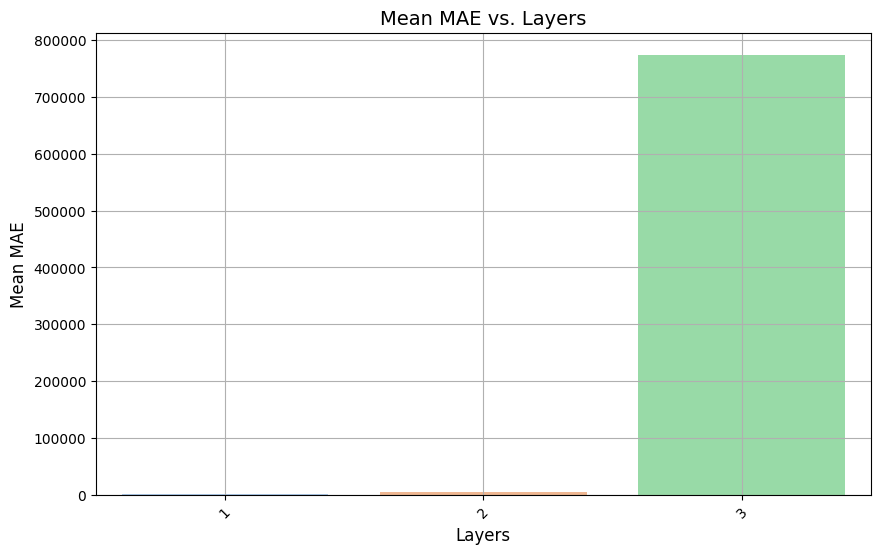

<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


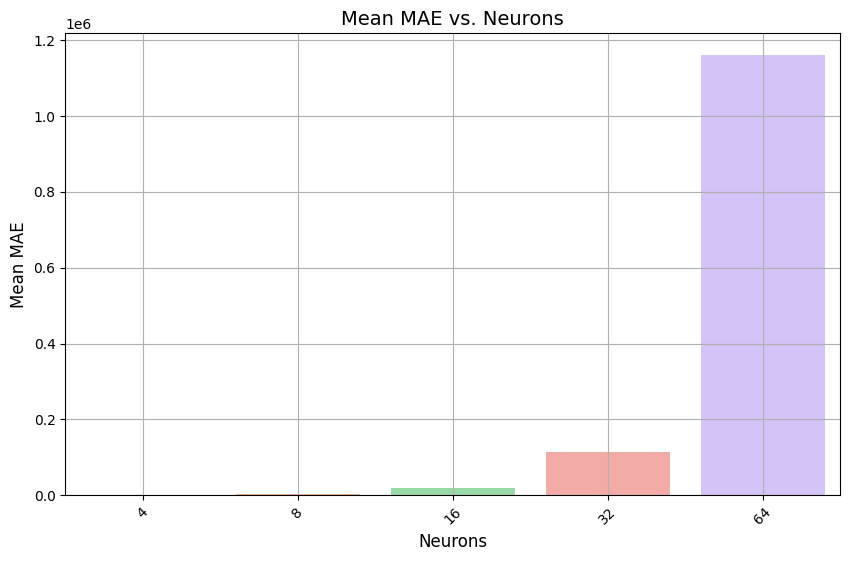

<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


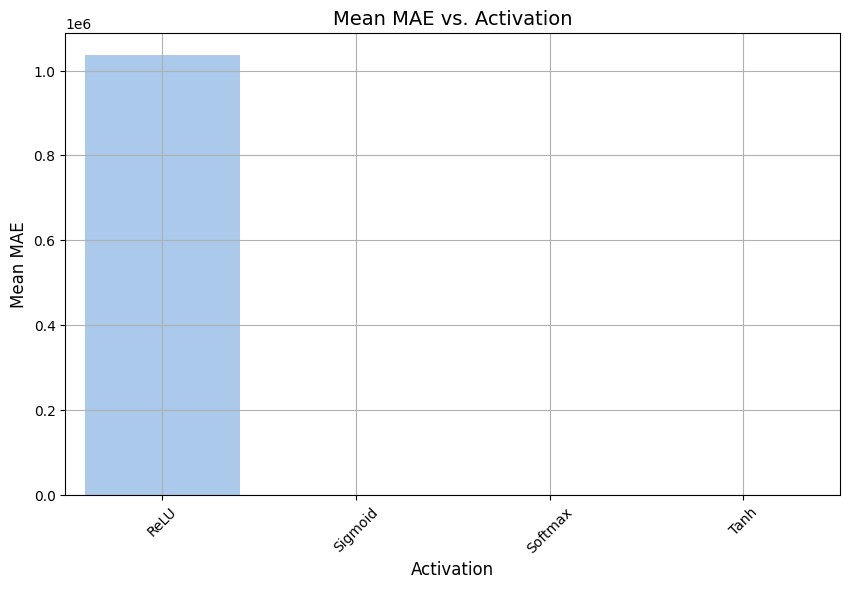

<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


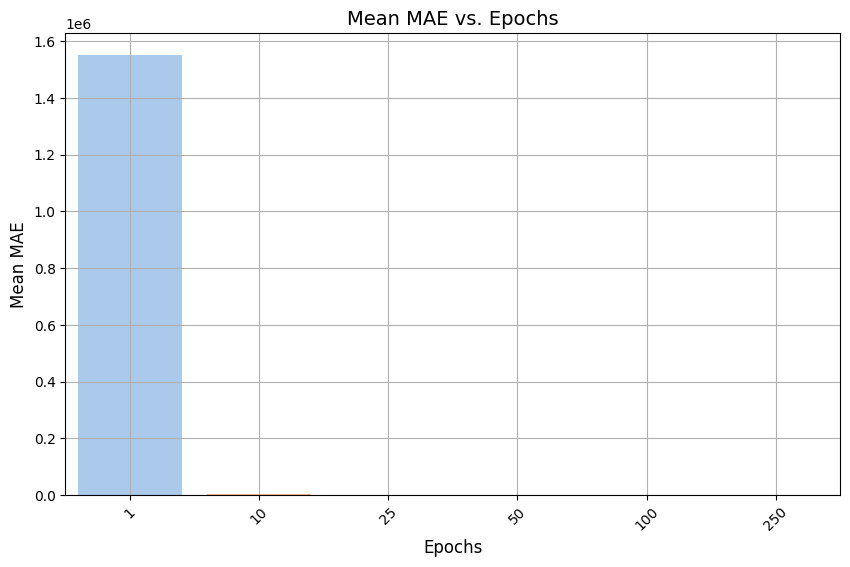

<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


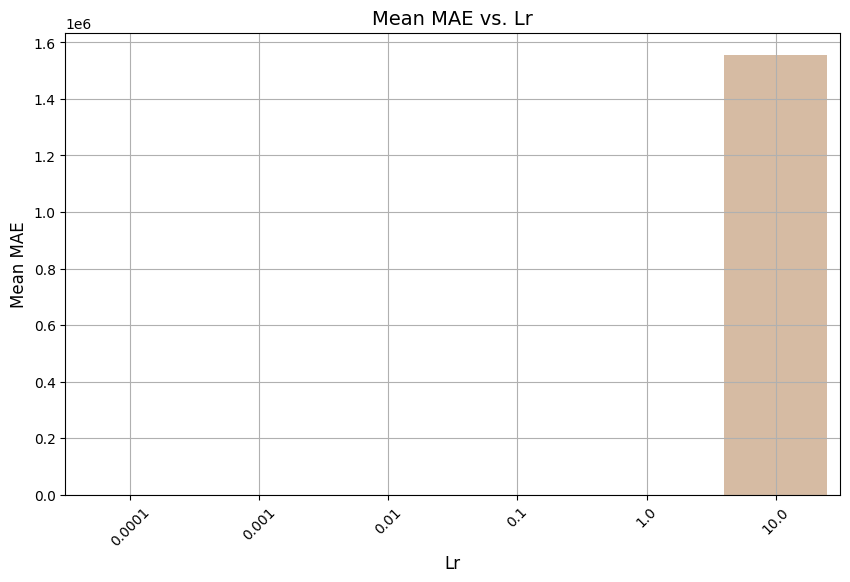

<ipython-input-28-485544f28447>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
<ipython-input-28-485544f28447>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot


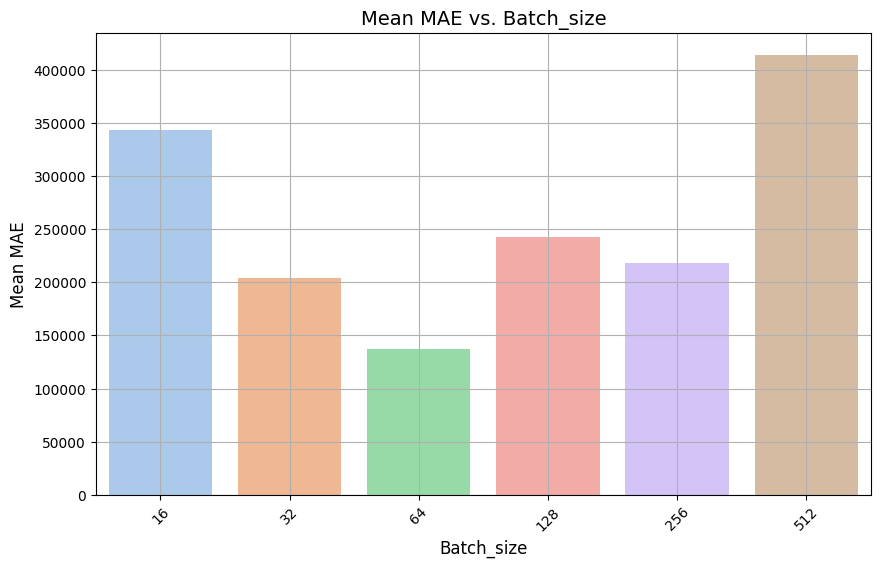

In [28]:
# Memilih hyperparameter yang relevan dan menghitung rata-rata MAE untuk setiap kombinasi
hyperparameters = ['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size']
mean_mae_by_hyperparameter = results_df.groupby(hyperparameters)['mae'].mean().reset_index()

# Membuat plot rata-rata MAE terhadap setiap hyperparameter
for param in hyperparameters:
    plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
    sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")  # Membuat bar plot
    plt.title(f'Mean MAE vs. {param.capitalize()}', fontsize=14)  # Menambahkan judul
    plt.xlabel(param.capitalize(), fontsize=12)  # Menambahkan label pada sumbu X
    plt.ylabel('Mean MAE', fontsize=12)  # Menambahkan label pada sumbu Y
    plt.xticks(rotation=45)  # Memutar label pada sumbu X agar mudah dibaca
    plt.grid(True)  # Menambahkan grid pada plot untuk memudahkan pembacaan
    plt.show()  # Menampilkan plot
